## 使用shapely库
shapely是一个用于处理和操作几何图形的Python库。它提供了对几何对象的创建、操作、分析、和几何变换的支持。

In [2]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, GeometryCollection
import pyproj
from shapely.ops import transform

<class 'shapely.geometry.point.Point'>
POINT (1 0)


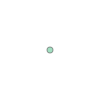

In [3]:
# 创建点对象
pt1 = Point(1, 0)
print(type(pt1))
print(pt1)
pt1

<class 'shapely.geometry.linestring.LineString'>
LINESTRING (1 0, 3 2, 5 1)


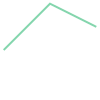

In [4]:
# 创建线对象
Line1 = LineString([(1, 0), (3, 2), (5, 1)])
print(type(Line1))
print(Line1)
Line1

<class 'shapely.geometry.polygon.Polygon'>
面积： 3.0
周长： 9.18760072786364
中心点： POINT (3 1)
边界： (1.0, 0.0, 5.0, 2.0)
POLYGON ((1 0, 3 2, 5 1, 1 0))


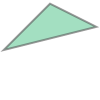

In [5]:
# 创建面对象
poly1 = Polygon([(1, 0), (3, 2), (5, 1)])
print(type(poly1))
print('面积：', poly1.area)
print('周长：', poly1.length)
print('中心点：', poly1.centroid)
print('边界：', poly1.bounds)
print(poly1)
poly1

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0), (0.1 0.1, 0.1 0.5, 0.5 0.5, 0.5 0.1, 0.1 0.1))


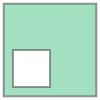

In [6]:
exterior = [(0,0), (0,1), (1,1), (1,0)]
interior = [[(0.1,0.1), (0.1,0.5), (0.5,0.5), (0.5,0.1)]] ##注意两个中括号
poly2 = Polygon(exterior, holes=interior)
print(poly2)
poly2

MULTIPOLYGON (((1 0, 3 2, 5 1, 1 0)), ((0 0, 0 1, 1 1, 1 0, 0 0), (0.1 0.1, 0.1 0.5, 0.5 0.5, 0.5 0.1, 0.1 0.1)))


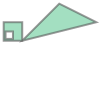

In [7]:
mpoly = MultiPolygon([poly1, poly2])
print(mpoly)
mpoly

GEOMETRYCOLLECTION (POLYGON ((1 0, 3 2, 5 1, 1 0)), POINT (3 1))


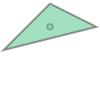

In [8]:
pt_centroid = poly1.centroid
geos = GeometryCollection([poly1, pt_centroid])
print(geos)
geos

POINT (1466939.6922422606 3361248.752300655)


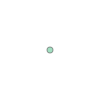

In [9]:
pt_wgs84 = Point(115, 30)
transformer = pyproj.Transformer.from_crs(4326, 32648, always_xy=True).transform
pt_utm48 = transform(transformer, pt_wgs84)
print(pt_utm48)
pt_utm48

In [10]:
# pt到pt1的距离
pt = Point(3, 0)
dist1 = pt1.distance(pt)
print(dist1)
# pt到Line1的距离
dist2 = pt.distance(Line1)
print(dist2)
# pt到poly1的距离
dist3 = pt.distance(poly1)
print(dist3)

2.0
1.4142135623730951
0.48507125007266594


In [11]:
pt1_centroid = poly1.centroid
## contains()方法用于判断一个点是否在一个多边形内
aa = poly1.contains(pt1_centroid)
bb = poly1.contains(pt)
print(pt1_centroid)
print(aa)
print(bb)

POINT (3 1)
True
False


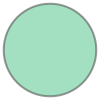

In [12]:
## buffer()方法表示缓冲区，即在几何对象周围创建一定的距离，并返回新的几何对象。
# 第一个参数为缓冲区的距离，第二个参数为缓冲区的样式，默认为圆形。
pt1_buffer = pt1.buffer(1, cap_style = 'round')
pt1_buffer

POLYGON ((2.2928932188134525 2.7071067811865475, 2.363989172112869 2.7716801324449962, 2.4409519133351694 2.8291352343233234, 2.5230715110437854 2.878942100722193, 2.6095904651413213 2.920641295560562, 2.6997106943172966 2.9538481707759363, 2.792600897831292 2.9782564144536003, 2.8874042237238213 2.99364087635562, 2.9832461727206443 2.999859644785954, 3.0792426649221345 2.9968553556339246, 3.1745081948677045 2.984655721520987, 3.268163999750109 2.963373276169743, 3.3593461654331422 2.933204336353243, 3.447213595499958 2.8944271909999157, 5.447213595499958 1.8944271909999157, 5.53272933529653 1.8462856818560254, 5.613114600374718 1.7899939789690489, 5.687595236688764 1.726094202209963, 5.755453954995707 1.6552017413601288, 5.816037238742901 1.5779993295712915, 5.868761637789669 1.495230468272109, 5.913119387351103 1.407692266842954, 5.948683298050514 1.316227766016838, 5.975110869986655 1.2217178189362987, 5.992147591195001 1.1250726080561142, 5.9996293887370955 1.027222879588707, 5.997

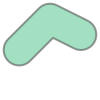

In [15]:
line1_buf = Line1.buffer(1)
print(line1_buf)
line1_buf

POLYGON ((1.242535625036333 -0.9701425001453319, 1.1444266686549722 -0.9895155063874577, 1.0448733472768255 -0.9989926840093342, 0.9448712618809328 -0.9984792547836931, 0.8454205013919822 -0.9879803533522789, 0.7475156411103097 -0.9676009758759352, 0.6521357962818948 -0.9375449300015273, 0.5602348302794218 -0.8981127966467414, 0.4727318153192713 -0.8496989239863076, 0.3905018411137412 -0.7927874837018183, 0.314367263378263 -0.727947628935343, 0.2450894797144733 -0.6558278023705882, 0.183361315115919 -0.5771492513646697, 0.1298000932465211 -0.4926988149835929, 0.0849414627837277 -0.4033210550759978, 0.0492340405671269 -0.3099098100797846, 0.0230349251246803 -0.2133992560293052, 0.0066061254443696 -0.1147545641591321, 0.0001119407059683 -0.0149622485347285, 0.0036173171774072 0.0849796997597221, 0.0170871987078864 0.1840717932114805, 0.0403868773132456 0.2813230434347251, 0.0732833403475011 0.3757608717289687, 0.1154476007879145 0.4664408355280906, 0.1664579873291611 0.552456073468875, 0

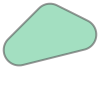

In [16]:
poly1_buf = poly1.buffer(1)
print(poly1_buf)
poly1_buf

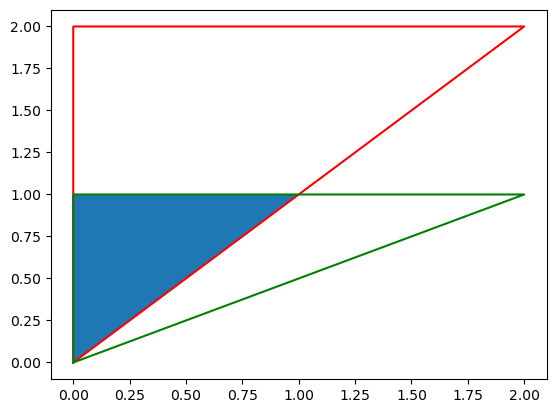

In [22]:
from shapely import intersection
import matplotlib.pyplot as plt

poly1 = Polygon([(0, 0), (0, 2), (2, 2)])
poly2 = Polygon([(0, 0), (0, 1), (2, 1)])
poly_inter = intersection(poly1, poly2)

plt.plot(poly1.exterior.xy[0], poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0], poly2.exterior.xy[1], color='green')
plt.fill(poly_inter.exterior.xy[0], poly_inter.exterior.xy[1])

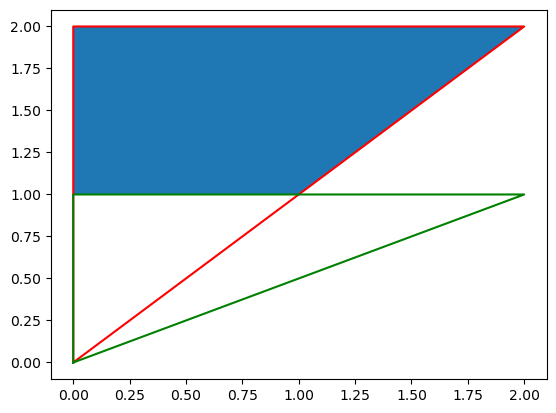

In [ ]:
## difference()方法功能：求两个多边形的差集，即返回两个多边形相交的部分。
poly_dif = poly1.difference(poly2)
plt.plot(poly1.exterior.xy[0], poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0], poly2.exterior.xy[1], color='green')
plt.fill(poly_dif.exterior.xy[0], poly_dif.exterior.xy[1])

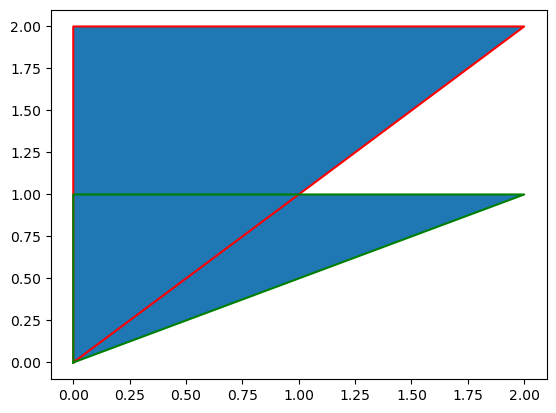

In [26]:
## union()方法功能：求两个多边形的并集。
poly_union = poly1.union(poly2)
plt.plot(poly1.exterior.xy[0], poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0], poly2.exterior.xy[1], color='green')
plt.fill(poly_union.exterior.xy[0], poly_union.exterior.xy[1])